In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset 
df_profits = pd.read_csv('2K_DataDemographic.csv')

name of the columns:
Index(['Customer ID', 'Title', 'Date Of Birth', 'Address City',
       'Contact Allowed', 'Registration Date', 'Source of Customer',
       '1st Order Profit', 'Subsequent Order Profit',
       'Subsequent Orders Count', 'Total value of all promotions',
       'Total Order Profit'],
      dtype='object')

First rows of 'Registration Date':
0   2013-01-01 00:23:00
1   2013-01-01 00:30:00
2   2013-01-01 01:09:00
3   2013-01-01 01:19:00
4   2013-01-01 01:58:00
Name: Registration Date, dtype: datetime64[ns]


<Figure size 1600x800 with 0 Axes>

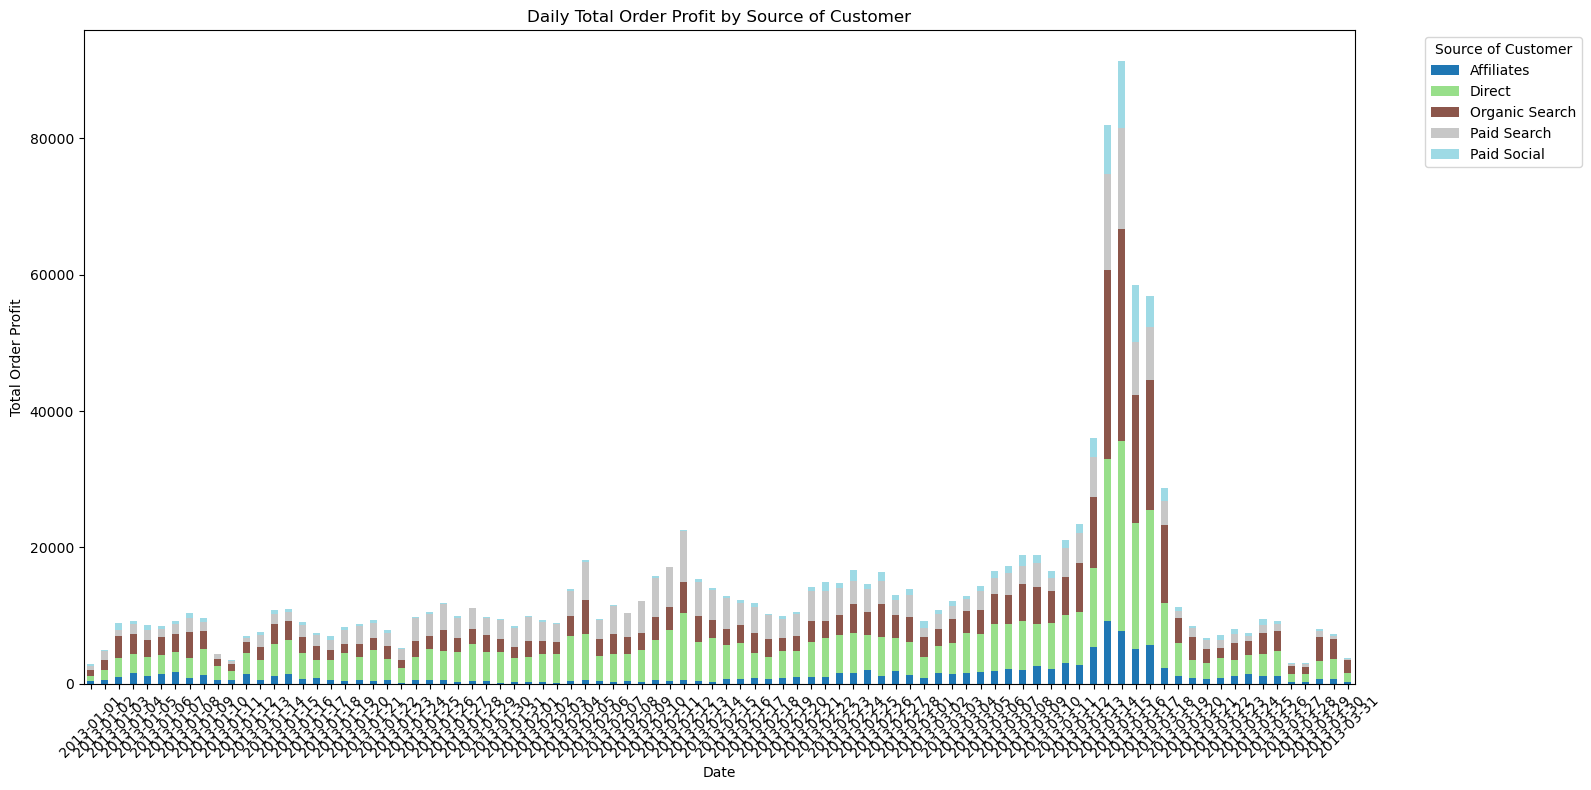

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df_profits = pd.read_csv('Prueba2K.csv', sep=';', encoding='utf-8')

print("name of the columns:")
print(df_profits.columns)

numeric_columns = [
    '1st Order Profit',
    'Subsequent Order Profit',
    'Subsequent Orders Count',
    'Total value of all promotions',
    'Total Order Profit'
]

for col in numeric_columns:
    df_profits[col] = df_profits[col].astype(str)

    df_profits[col] = df_profits[col].str.replace(',', '.', regex=False)

    df_profits[col] = df_profits[col].str.replace('€', '', regex=False)
    df_profits[col] = df_profits[col].str.replace(' ', '', regex=False)

    df_profits[col] = pd.to_numeric(df_profits[col], errors='coerce')

    mean_value = df_profits[col].mean()
    df_profits[col].fillna(mean_value, inplace=True)

df_profits['Registration Date'] = pd.to_datetime(df_profits['Registration Date'], format='%d/%m/%y %H:%M', errors='coerce')

print("\nFirst rows of 'Registration Date':")
print(df_profits['Registration Date'].head())

df_profits['Registration Day'] = df_profits['Registration Date'].dt.date

daily_profit_source = df_profits.groupby(['Registration Day', 'Source of Customer'])['Total Order Profit'].sum().reset_index()

daily_profit_pivot = daily_profit_source.pivot(index='Registration Day', columns='Source of Customer', values='Total Order Profit')

daily_profit_pivot.fillna(0, inplace=True)

daily_profit_pivot.sort_index(inplace=True)

plt.figure(figsize=(16, 8))
daily_profit_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

plt.title('Daily Total Order Profit by Source of Customer')
plt.xlabel('Date')
plt.ylabel('Total Order Profit')
plt.xticks(rotation=45)
plt.legend(title='Source of Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Name of the columns:
Index(['Customer ID', 'Title', 'Date Of Birth', 'Address City',
       'Contact Allowed', 'Registration Date', 'Source of Customer',
       '1st Order Profit', 'Subsequent Order Profit',
       'Subsequent Orders Count', 'Total value of all promotions',
       'Total Order Profit'],
      dtype='object')

First Rows of 'Registration Date':
0   2013-01-01 00:23:00
1   2013-01-01 00:30:00
2   2013-01-01 01:09:00
3   2013-01-01 01:19:00
4   2013-01-01 01:58:00
Name: Registration Date, dtype: datetime64[ns]


<Figure size 1200x600 with 0 Axes>

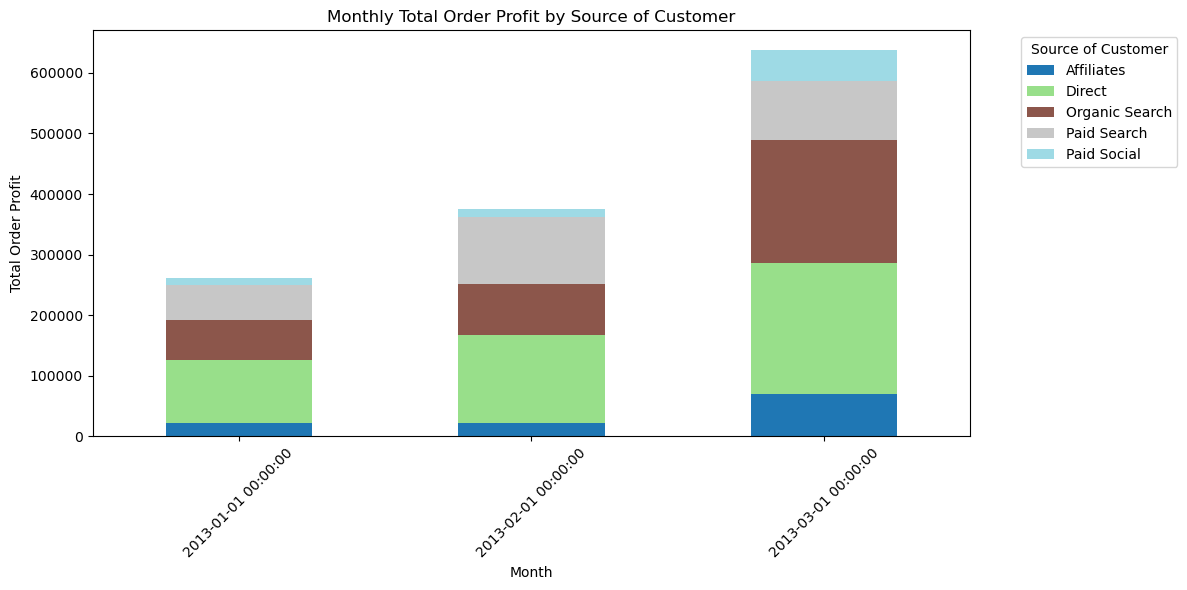

In [11]:
pd.set_option('display.max_columns', None)

df_profits = pd.read_csv('Prueba2K.csv', sep=';', encoding='utf-8')

print("Name of the columns:")
print(df_profits.columns)

numeric_columns = [
    '1st Order Profit',
    'Subsequent Order Profit',
    'Subsequent Orders Count',
    'Total value of all promotions',
    'Total Order Profit'
]

for col in numeric_columns:

    df_profits[col] = df_profits[col].astype(str)

    df_profits[col] = df_profits[col].str.replace(',', '.', regex=False)
 
    df_profits[col] = df_profits[col].str.replace('€', '', regex=False)
    df_profits[col] = df_profits[col].str.replace(' ', '', regex=False)
 
    df_profits[col] = pd.to_numeric(df_profits[col], errors='coerce')

    mean_value = df_profits[col].mean()
    df_profits[col].fillna(mean_value, inplace=True)

df_profits['Registration Date'] = pd.to_datetime(df_profits['Registration Date'], format='%d/%m/%y %H:%M', errors='coerce')

print("\nFirst Rows of 'Registration Date':")
print(df_profits['Registration Date'].head())

df_profits['Registration Month'] = df_profits['Registration Date'].dt.to_period('M').dt.to_timestamp()

monthly_profit_source = df_profits.groupby(['Registration Month', 'Source of Customer'])['Total Order Profit'].sum().reset_index()

monthly_profit_pivot = monthly_profit_source.pivot(index='Registration Month', columns='Source of Customer', values='Total Order Profit')

monthly_profit_pivot.fillna(0, inplace=True)

monthly_profit_pivot.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
monthly_profit_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Monthly Total Order Profit by Source of Customer')
plt.xlabel('Month')
plt.ylabel('Total Order Profit')
plt.xticks(rotation=45)
plt.legend(title='Source of Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
